In [109]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import copy
PLOTDIR = '/storage/BonnieH/selection_project/figures/figures/example_loci/'

Populating the interactive namespace from numpy and matplotlib


In [110]:
def make_figure(y_pos, all_vals, color_list, all_name, fig_num):
    fig = plt.figure(fig_num)
    fig.set_size_inches((10, 5))
    ax = fig.add_subplot(111)
    y_pos = np.arange(len(all_name))
    plt.bar(y_pos, all_vals, color=color_list)
    plt.xticks(y_pos, all_name)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor") 
    
    plt.title("Selection at example loci")
    ax.text(0.2, 0.95, "CODIS", transform=ax.transAxes, verticalalignment='top')
    ax.text(0.65, 0.95, "Pathogenic \n (late onset)", transform=ax.transAxes, verticalalignment='top')
    ax.text(0.86, 0.95, "Pathogenic \n (early onset)", transform=ax.transAxes, verticalalignment='top')
    if fig_num == 1:
        plt.ylabel('p-values [-log10]')
        plt.savefig(PLOTDIR + 'p_vals.pdf',bbox_inches='tight')
    if fig_num == 2:
        plt.yscale('log')
        plt.ylabel('Posterior estimate of s')
        plt.savefig(PLOTDIR + 's_vals.pdf',bbox_inches='tight')

In [111]:
def plot_figure(inFile, codis_dic, late_dic, early_dic):
    results = open(inFile, 'r')
    header = results.readline()
    
    # Lists containing names, p values, s values
    name_codis = []
    p_codis = []
    s_codis = []
    name_late = []
    p_late = []
    s_late = []
    name_early = []
    p_early = []
    s_early = []
    
    for line in results:
        # Get information from line
        info = line.strip().split('\t')
        chrom = info[0]
        chrom = 'chr' + str(chrom)
        start = int(info[1])
        end = int(info[2])
        per = int(info[3])
        opt_allele = int(info[4])
        het = float(info[13])
        ABC_s = info[16]
        
        if ABC_s != 'N/A':
            ABC_s = float(info[16])
            p_val = float(info[23])
        
            if (chrom, start) in codis_dic:
                
                name = codis_dic[(chrom, start)]
                name_codis.append(name + " (" + chrom + ":" + str(start) + ")" + " per:" + str(per) + " opt_ru:" + str(opt_allele))
                p_codis.append(-1*np.log10(p_val)) 
                s_codis.append(ABC_s)
                
            if (chrom, start) in late_dic:
               
                name = late_dic[(chrom, start)]
                name_late.append(name + " (" + chrom + ":" + str(start) + ")" + " per:" + str(per) +" opt_ru:" + str(opt_allele))
                p_late.append(-1*np.log10(p_val))
                s_late.append(ABC_s)
               
            if (chrom, start) in early_dic:

                name = early_dic[(chrom, start)]
                name_early.append(name + " (" + chrom + ":" + str(start) + ")" + " per:" + str(per) +" opt_ru:" + str(opt_allele))
                p_early.append(-1*np.log10(p_val))
                s_early.append(ABC_s)
                
    all_name = name_codis + name_late + name_early
    all_p = p_codis + p_late + p_early
    all_s = s_codis + s_late + s_early
    color_codis = ['black'] * len(name_codis)
    color_late = ['blue'] * len(name_late)
    color_early = ['orange'] * len(name_early)
    color_list = color_codis + color_late + color_early
    
    y_pos = np.arange(len(all_name))
    # Plot p values
    make_figure(y_pos, all_p, color_list, all_name, 1)
    # Plot s values
    make_figure(y_pos, all_s, color_list, all_name, 2)

In [112]:
def main():
    
    print('Running main')
    
    inFile = '/storage/BonnieH/selection_project/per_locus/final_results/0.005_3_0.3_yny3_eurodem_pr1.txt'
    codisFile = '/storage/BonnieH/selection_project/annotations/hg38_codis.bed'
    lateonsetFile = '/storage/BonnieH/selection_project/annotations/hg38_lateonset.txt'
    earlyonsetFile = '/storage/BonnieH/selection_project/annotations/hg38_earlyonset.txt'
    
    # Read files into dictionaries (key: (chrom, start), value: gene name)
    codis = open(codisFile, 'r')
    codis_dic = {}
    for line in codis:
        info = line.strip().split('\t')
        chrom = info[0]
        start = int(info[1])
        end = int(info[2])
        name = info[5]
        codis_dic[(chrom, start)] = name
    codis.close()    
    
    late = open(lateonsetFile, 'r')
    late_dic = {}
    for line in late:
        info = line.strip().split('\t')
        chrom = info[0]
        start = int(info[1])
        end = int(info[2])
        name = info[5]
        late_dic[(chrom, start)] = name
    late.close()
    
    early = open(earlyonsetFile, 'r')
    early_dic = {}
    for line in early:
        info = line.strip().split('\t')
        chrom = info[0]
        start = int(info[1])
        end = int(info[2])
        name = info[5]
        early_dic[(chrom, start)] = name
    early.close()
    
    # Plot figure
    plot_figure(inFile, codis_dic, late_dic, early_dic)

Running main
CPU times: user 1.96 s, sys: 54.9 ms, total: 2.01 s
Wall time: 12.5 s


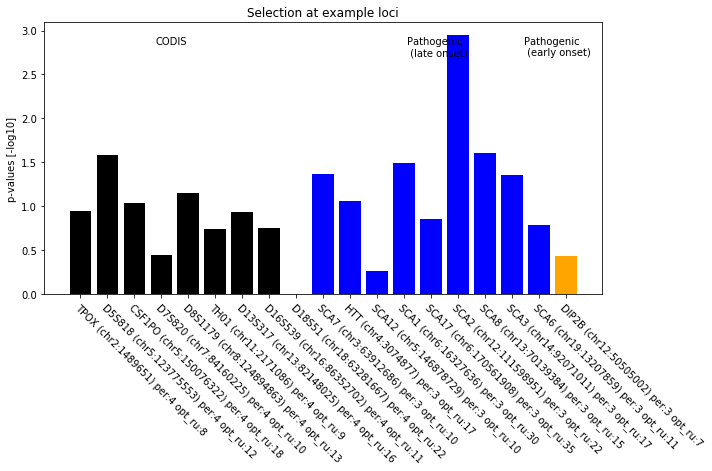

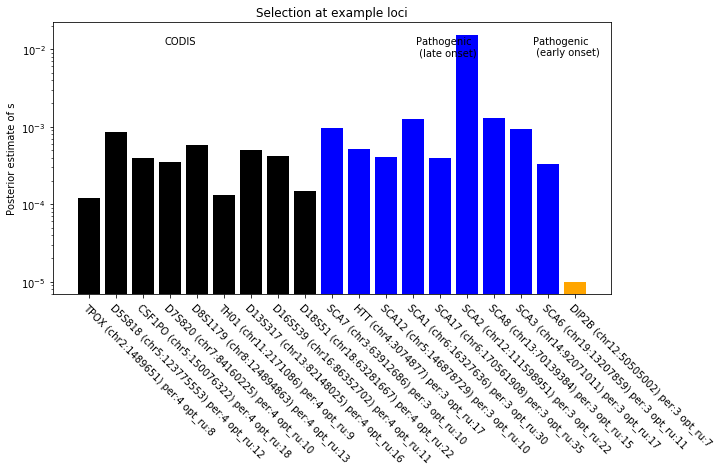

In [113]:
%%time
if __name__ == '__main__':
    main()